In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [64]:
d = pd.read_csv("Search_Volume_17_03.csv")

In [65]:
d.head()

,Keywords,Country,Trend,Category,Avg. monthly searches,Competition (indexed value),Searches: Sep 2015,Searches: Oct 2015,Searches: Nov 2015,Searches: Dec 2015,...,Searches: Sep 2019,Searches: Oct 2019,Searches: Nov 2019,Searches: Dec 2019,Searches: Jan 2020,Searches: Feb 2020,Searches: Mar 2020,Searches: Apr 2020,Top of page bid (low range),Top of page bid (high range)
0,2-in-1 HairCare Products,FR,Trend,Small C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2-in-1 HairCare Products,ID,Trend,Small C,32.352941,49.312500,11.764706,10.000000,11.764706,16.470588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.96,9880.52
2,2-in-1 HairCare Products,PK,Trend,Small C,10.000000,1.666667,1.052632,1.578947,0.526316,0.789474,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2-in-1 HairCare Products,TH,Trend,Small C,30.000000,95.000000,NaN,NaN,NaN,NaN,...,30.0,40.0,30.0,40.0,30.0,50.0,50.0,50.0,NaN,NaN
4,2-in-1 HairCare Products,TR,Trend,Small C,12.500000,100.000000,2.500000,0.000000,0.000000,10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### EDA on static data

In [66]:
## Let's first take aggregated data

In [67]:
cols = ['Avg. monthly searches',
       'Competition (indexed value)',
       'Top of page bid (low range)',
       'Top of page bid (high range)'
       ]

#### Missing Value check

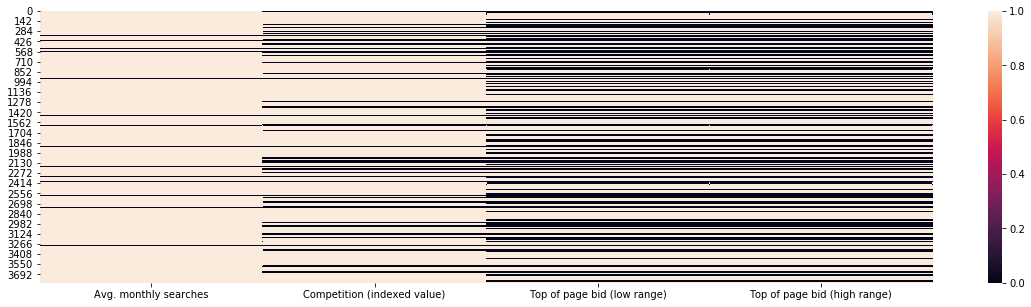

In [68]:
plt.figure(figsize=(20,5))
sns.heatmap(~d[cols].isna())

In [69]:
## Check basic statistics
d[cols].describe()

,Avg. monthly searches,Competition (indexed value),Top of page bid (low range),Top of page bid (high range)
count,3638.000000,3124.000000,2190.000000,2190.000000
mean,166.513575,38.915448,54.413205,2876.296849
std,1124.744091,32.468494,274.363826,15163.801830
min,0.000000,0.000000,0.010000,0.050000
25%,14.000000,7.997805,0.150000,11.340000
50%,43.186203,32.030642,1.210000,74.560000
75%,136.238267,67.044793,6.075000,398.602500
max,60500.000000,100.000000,5569.850000,377522.980000


In [70]:
## let's check the distribution of each of this KPI with respect to whether it is a trend of not

In [71]:
## Total missing values in Avg. Monthly searches

Missing values in Avg. monthly searches = 172
Missing values in Competition (indexed value) = 686
Missing values in Top of page bid (low range) = 1620
Missing values in Top of page bid (high range) = 1620


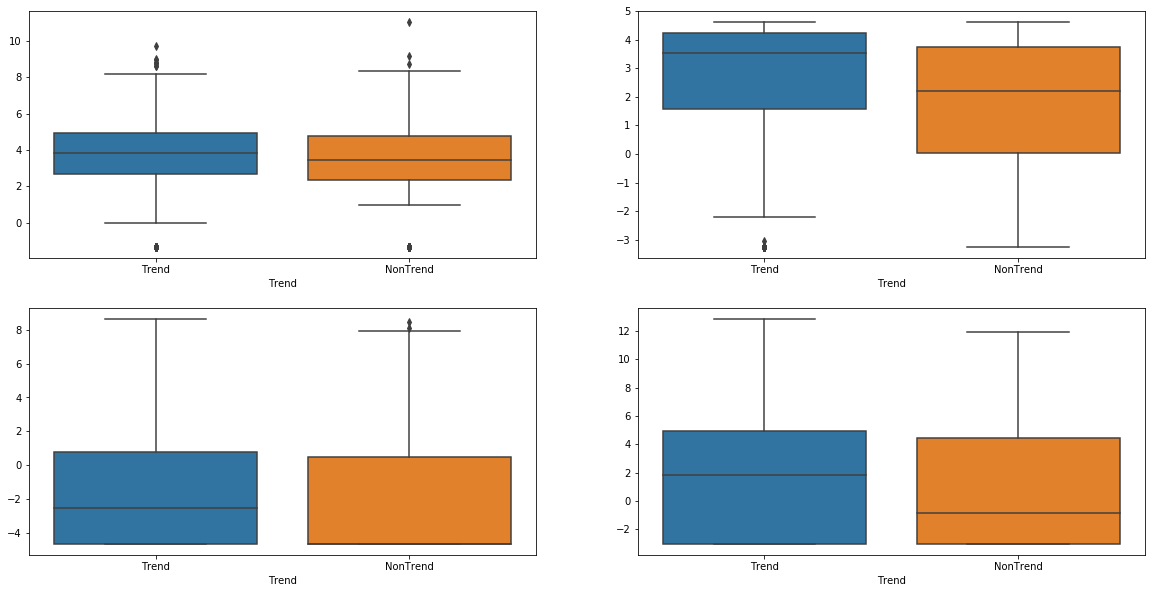

In [72]:
fig, ax = plt.subplots(2 ,2, figsize = (20,10))
r = 0
c = 0
for idx, kpi in enumerate(cols):
    print("Missing values in {} = {}".format(kpi, sum(d[kpi].isna())))
    d[kpi].replace(0,np.e, inplace =True)
    d[kpi].fillna(d[kpi].min(), inplace = True)
    d[kpi].index
    sns.boxplot(y= np.log(d[kpi]).values, x = d["Trend"], ax = ax[r][c],)
    c += 1
    if (idx+1) % 2 == 0:
        r+=1
        c = 0

#### Competition Index does seem to have a different distribution for Trend or Non Trend keywords. Let's confirm it using Analysis of Variance..

What is ANOVA ?
Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

Ex : 
 * We can use ANOVA to prove/disprove if all the medication treatments were equally effective or not.
 * In current global context, we can check whether SpO2 levels of people with Vaccine and without Vaccine is significantly different or not.

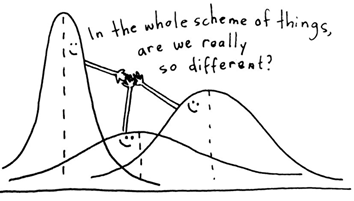

In [73]:
## Anova
import scipy
numeric_fl = cols
result = pd.DataFrame(columns = numeric_fl)
for cat in ["Trend"]:
    groups = d.groupby(cat)
    args = list()
    for group in groups:
        args.append(group[1][numeric_fl])
    args = tuple(args)
    
    result.loc[cat,:] = scipy.stats.f_oneway(*args).pvalue
result = pd.DataFrame(np.array(result, dtype = np.float32), columns = numeric_fl, index = result.index)

In [74]:
result

,Avg. monthly searches,Competition (indexed value),Top of page bid (low range),Top of page bid (high range)
Trend,0.900556,5.044674e-44,0.771808,0.008886


In [75]:
d[cols] = np.log(d[cols])

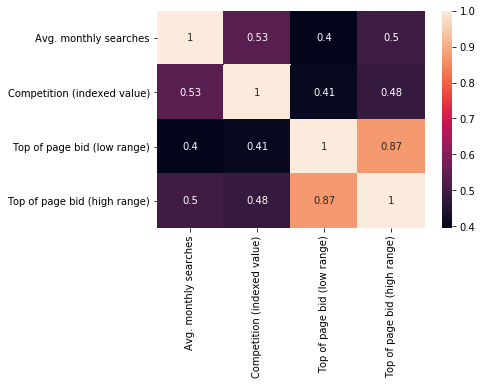

In [76]:
sns.heatmap(d[cols].corr(),annot = True)

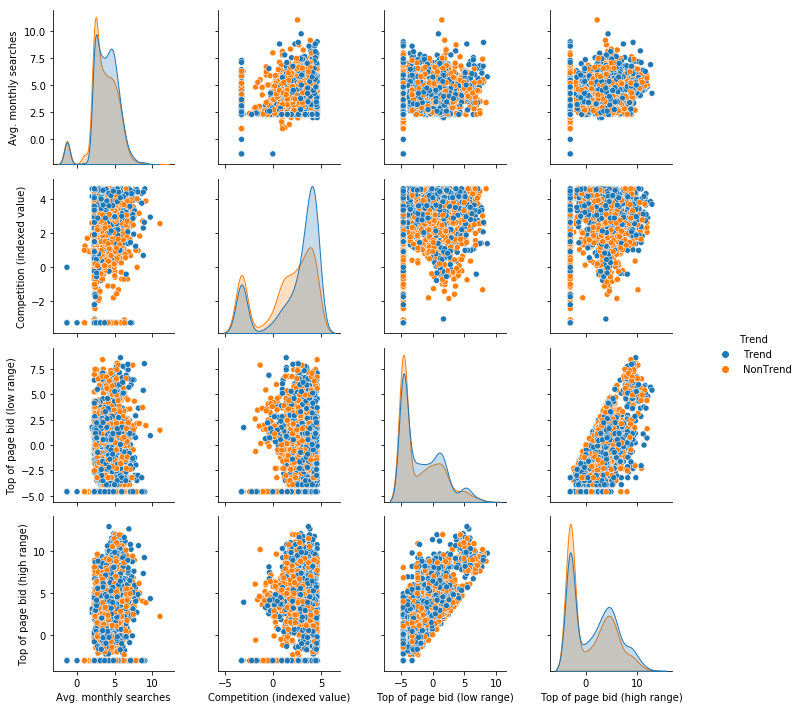

In [77]:
sns.pairplot(x_vars = cols, 
             y_vars = cols, 
             data = d,
             hue = "Trend",
             kind = "scatter",
             diag_kind= "kde"
            )

In [78]:
## Let's do some feature engineering

In [79]:
d["Top of page bid (high range)"] = np.exp(d["Top of page bid (high range)"])
d["Top of page bid (low range)"] = np.exp(d["Top of page bid (low range)"])

In [80]:
d["Range of bid"] = d["Top of page bid (high range)"] - d["Top of page bid (low range)"]

In [81]:
d["Range of bid"].replace(0, 0.0001, inplace = True)

In [82]:
d["Range of bid"] = np.log(d["Range of bid"])

In [83]:
## Let's check if the data is linearly seperable by doing PCA on numerical variable

In [84]:
search_data = d.iloc[:,6:-3]

In [85]:
search_data.fillna(0, inplace = True)

In [86]:
d.iloc[:,6:-3] = search_data

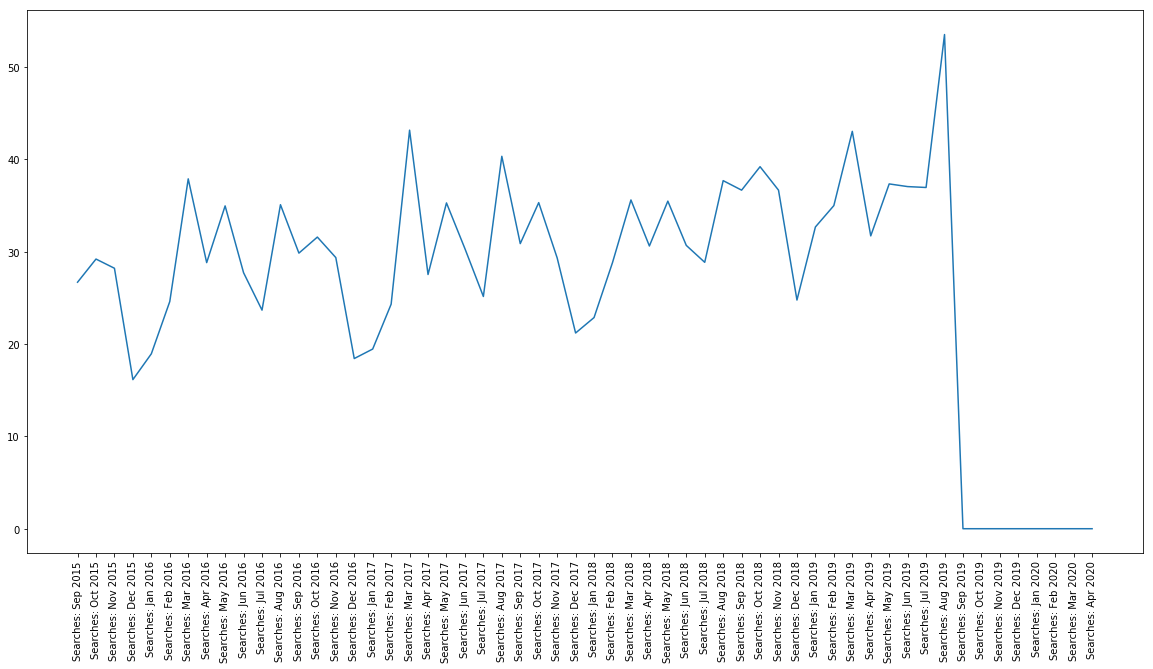

In [87]:
plt.figure(figsize = (20,10))
plt.plot(search_data.T.loc[:,40])
plt.xticks(rotation = 90);

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
import numpy as np

def get_rolling_window_statistical_features(t):
    t = pd.Series(data = t, index = t.index, dtype = np.float32)
    mn = MinMaxScaler()
    t = pd.Series(mn.fit_transform(t.values.reshape(-1, 1)).reshape(-1), index = t.index)
    min_len = 10
    cur_idx = 0
    features = {}
    while cur_idx < len(t):
        features["{}_{}_rolling_mean".format(cur_idx,cur_idx + min_len)] = t[cur_idx: cur_idx + min_len].mean()
        features["{}_{}_rolling_std".format(cur_idx,cur_idx + min_len)] = t[cur_idx: cur_idx + min_len].std()
        features["{}_{}_rolling_skew".format(cur_idx,cur_idx + min_len)] = t[cur_idx: cur_idx + min_len].skew()
        features["{}_{}_rolling_kurtosis".format(cur_idx,cur_idx + min_len)] = t[cur_idx: cur_idx + min_len].kurtosis()
        f = np.polyfit(np.array(range(len(t[cur_idx: cur_idx + min_len]))), t[cur_idx: cur_idx + min_len].values, deg=1)
        features["{}_{}_rolling_slope".format(cur_idx, cur_idx + min_len)] = f[0]
        cur_idx += min_len
    return features


def get_expanding_window_statistical_features(t):
    t = pd.Series(data = t, index = t.index, dtype = np.float32)
    mn = MinMaxScaler()
    t = pd.Series(mn.fit_transform(t.values.reshape(-1, 1)).reshape(-1), index = t.index)
    
    min_len = 10
    step = 10
    cur_idx = 0
    features = {}
    while min_len < len(t):
        features["{}_{}_expand_mean".format(cur_idx,cur_idx + min_len)] = t[cur_idx: cur_idx + min_len].mean()
        features["{}_{}_expand_std".format(cur_idx,cur_idx + min_len)] = t[cur_idx: cur_idx + min_len].std()
        features["{}_{}_expand_skew".format(cur_idx,cur_idx + min_len)] = t[cur_idx: cur_idx + min_len].skew()
        features["{}_{}_expand_kurtosis".format(cur_idx,cur_idx + min_len)] = t[cur_idx: cur_idx + min_len].kurtosis()
        f = np.polyfit(np.array(range(len(t[cur_idx: cur_idx + min_len]))), t[cur_idx: cur_idx + min_len].values, deg=1)
        features["{}_{}_expand_slope".format(cur_idx, cur_idx + min_len)] = f[0]
        min_len += 10
    return features

In [92]:
for idx, row in enumerate(d.iterrows()):
    t = row[1].iloc[6:62]
    rolling_features = get_rolling_window_statistical_features(t)
    for feat in rolling_features.items():
        d.loc[idx, feat[0]] = feat[1]
    exapanding_features = get_expanding_window_statistical_features(t)
    for feat in exapanding_features.items():
        d.loc[idx, feat[0]] = feat[1]

In [99]:
d.columns.values

array(['Keywords', 'Country', 'Trend', 'Category',
       'Avg. monthly searches', 'Competition (indexed value)',
       'Searches: Sep 2015', 'Searches: Oct 2015', 'Searches: Nov 2015',
       'Searches: Dec 2015', 'Searches: Jan 2016', 'Searches: Feb 2016',
       'Searches: Mar 2016', 'Searches: Apr 2016', 'Searches: May 2016',
       'Searches: Jun 2016', 'Searches: Jul 2016', 'Searches: Aug 2016',
       'Searches: Sep 2016', 'Searches: Oct 2016', 'Searches: Nov 2016',
       'Searches: Dec 2016', 'Searches: Jan 2017', 'Searches: Feb 2017',
       'Searches: Mar 2017', 'Searches: Apr 2017', 'Searches: May 2017',
       'Searches: Jun 2017', 'Searches: Jul 2017', 'Searches: Aug 2017',
       'Searches: Sep 2017', 'Searches: Oct 2017', 'Searches: Nov 2017',
       'Searches: Dec 2017', 'Searches: Jan 2018', 'Searches: Feb 2018',
       'Searches: Mar 2018', 'Searches: Apr 2018', 'Searches: May 2018',
       'Searches: Jun 2018', 'Searches: Jul 2018', 'Searches: Aug 2018',
       'Se

In [93]:
### We can do a 1-way Anova to check if the distribution of these variables changes with Trend variable

In [100]:
## Anova
import scipy
numeric_fl = d.columns.values[65:]
result = pd.DataFrame(columns = numeric_fl)
for cat in ["Trend"]:
    groups = d.groupby(cat)
    args = list()
    for group in groups:
        args.append(group[1][numeric_fl])
    args = tuple(args)
    
    result.loc[cat,:] = scipy.stats.f_oneway(*args).pvalue
result = pd.DataFrame(np.array(result, dtype = np.float32), columns = numeric_fl, index = result.index)

In [101]:
r = result.T

In [102]:
timeseriesVars = r[r <= 0.05].dropna().index

In [123]:
timeseriesVars

Index(['0_10_rolling_std', '0_10_rolling_kurtosis', '0_10_rolling_slope',
       '10_20_rolling_std', '10_20_rolling_slope', '20_30_rolling_mean',
       '20_30_rolling_std', '20_30_rolling_slope', '30_40_rolling_mean',
       '30_40_rolling_std', '30_40_rolling_kurtosis', '40_50_rolling_mean',
       '40_50_rolling_std', '40_50_rolling_skew', '40_50_rolling_kurtosis',
       '40_50_rolling_slope', '50_60_rolling_std', '50_60_rolling_kurtosis',
       '50_60_rolling_slope', '0_10_expand_std', '0_10_expand_kurtosis',
       '0_10_expand_slope', '0_20_expand_std', '0_20_expand_skew',
       '0_20_expand_kurtosis', '0_30_expand_mean', '0_30_expand_std',
       '0_30_expand_skew', '0_30_expand_kurtosis', '0_30_expand_slope',
       '0_40_expand_mean', '0_40_expand_std', '0_40_expand_skew',
       '0_40_expand_kurtosis', '0_40_expand_slope', '0_50_expand_mean',
       '0_50_expand_slope'],
      dtype='object')